In [44]:
%run "..\data_cleaning\data_preprocessing.ipynb"
from ast import literal_eval

In [45]:
df = pd.read_csv("../../new_df.csv")
df.drop(columns="Unnamed: 0", inplace=True)
df['left_closest'] = df['left_closest'].apply(literal_eval)

In [46]:
left_df = clean_left()
right_df = clean_right()

In [25]:
temp_df = df[(df["WORLDPOSX"] > 400) & (df["WORLDPOSX"] < 500)&(df["WORLDPOSY"] > 100) & (df["WORLDPOSY"] < 200)]

In [27]:
temp_df[["WORLDPOSX","WORLDPOSY"]]

,WORLDPOSX,WORLDPOSY
7738,400.168121,144.189819
7739,400.481964,142.075653
7740,400.755676,139.978546
7741,400.991791,137.904510
7742,401.198334,135.845688
...,...,...
275763,411.606537,136.938858
275764,410.593964,136.462418
275765,410.593994,136.461914
275766,406.430267,153.023285


In [32]:
temp_df.iloc[0]

LAP_INDEX                                                   55
SESSION_IDENTIFIER                      10674158181360488448.0
FRAME                                                     1470
LAP_NUM                                                      1
SECTOR                                                       1
LAP_DISTANCE                                        420.393677
CURRENT_LAP_TIME_MS                                       8792
SECTOR_1_TIME_MS                                         21550
SECTOR_2_TIME_MS                                         41980
LAP_TIME_MS                                           222534.0
SECTOR_3_MS                                           159004.0
SPEED_KPH                                                154.0
THROTTLE                                                   0.0
BRAKE                                                      0.0
GEAR                                                       4.0
ENGINE_RPM                                             

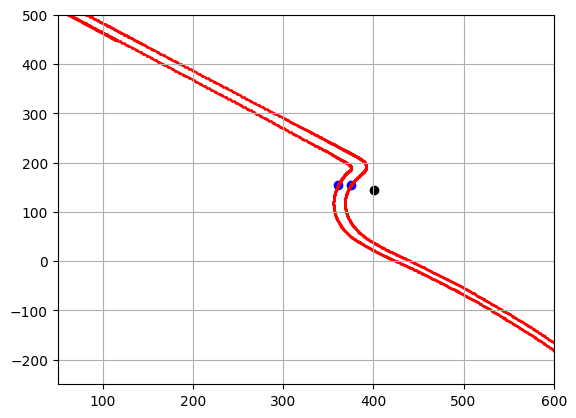

In [29]:
plt.scatter(375.0137634277344, 153.8986053466797,c='blue')
plt.scatter(361.1746826171875, 154.93446350097656,c='blue')
plt.scatter(400.168121, 144.189819,c='black')
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"],s=1,c='red')
plt.scatter(right_df["WORLDPOSX"], right_df["WORLDPOSY"], s=1,c='red')
plt.grid(True)
plt.xlim(50, 600)
plt.ylim(-250, 500)
# plt.xlim(100, 120)
# plt.ylim(450, 470)
plt.show()

In [33]:
df.columns

Index(['LAP_INDEX', 'SESSION_IDENTIFIER', 'FRAME', 'LAP_NUM', 'SECTOR',
       'LAP_DISTANCE', 'CURRENT_LAP_TIME_MS', 'SECTOR_1_TIME_MS',
       'SECTOR_2_TIME_MS', 'LAP_TIME_MS', 'SECTOR_3_MS', 'SPEED_KPH',
       'THROTTLE', 'BRAKE', 'GEAR', 'ENGINE_RPM', 'STEERING', 'YAW', 'PITCH',
       'ROLL', 'WORLDPOSX', 'WORLDPOSY', 'WORLDPOSZ', 'WORLDFORWARDDIRX',
       'WORLDFORWARDDIRY', 'WORLDFORWARDDIRZ', 'WORLDRIGHTDIRX',
       'WORLDRIGHTDIRY', 'WORLDRIGHTDIRZ', 'left_shortest', 'right_shortest',
       'left_closest', 'right_closest'],
      dtype='object')

In [42]:
temp_df.iloc[0]["left_closest"][0]

375.0137634277344

In [47]:
trial_df = df[(df["left_shortest"]+df["right_shortest"])>(np.sqrt((df["left_closest"][0]-df["right_closest"][0])**2+(df["left_closest"][1]-df["right_closest"][1])**2))]

TypeError: unsupported operand type(s) for -: 'tuple' and 'str'

In [51]:
df

,LAP_INDEX,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,...,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,left_shortest,right_shortest,left_closest,right_closest
0,1,1.003468e+19,1680,1,1,1.775714,16,30129,18569,87226.0,...,-23615.0,-138.0,-22714.0,22704.0,846.0,-23610.0,3.455802,10.174289,"(116.08881378173828, 467.1883850097656)","(105.4539566040039, 458.6979064941406)"
1,1,1.003468e+19,1681,1,1,5.864580,66,30129,18569,87226.0,...,-23685.0,-190.0,-22641.0,22630.0,850.0,-23681.0,3.365434,10.182519,"(118.38107299804688, 464.9837646484375)","(109.8089599609375, 454.4977111816406)"
2,1,1.003468e+19,1682,1,1,9.964501,116,30129,18569,87226.0,...,-23765.0,-195.0,-22557.0,22547.0,812.0,-23761.0,3.497007,10.153931,"(121.62169647216795, 462.06842041015625)","(112.1916275024414, 452.2031555175781)"
3,1,1.003468e+19,1683,1,1,14.072903,166,30129,18569,87226.0,...,-23824.0,-174.0,-22495.0,22485.0,809.0,-23820.0,3.361903,10.176946,"(124.0387954711914, 459.542724609375)","(114.97864532470705, 449.5224914550781)"
4,1,1.003468e+19,1684,1,1,18.184681,216,30129,18569,87226.0,...,-23838.0,-140.0,-22480.0,22471.0,820.0,-23833.0,3.361401,10.242086,"(127.84263610839844, 455.8820495605469)","(117.3753433227539, 447.2208557128906)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278104,1359,9.988606e+18,3258,2,1,836.135742,13271,32563,18983,91857.0,...,-20363.0,-49.0,-25670.0,25662.0,-855.0,-20355.0,7.333521,2.523359,"(595.0112915039062, -159.18409729003906)","(587.8803100585938, -165.7380828857422)"
278105,1359,9.988606e+18,3259,2,1,840.134277,13321,32563,18983,91857.0,...,-20459.0,-93.0,-25594.0,25587.0,-837.0,-20450.0,7.352190,2.344569,"(597.0923461914062, -161.74734497070312)","(589.7338256835938, -168.0529022216797)"
278106,1359,9.988606e+18,3260,2,1,844.142578,13371,32563,18983,91857.0,...,-20511.0,-58.0,-25552.0,25544.0,-891.0,-20503.0,7.431272,2.393826,"(599.1694946289062, -164.32089233398438)","(592.5140991210938, -171.54800415039062)"
278107,1359,9.988606e+18,3261,2,1,848.166992,13421,32563,18983,91857.0,...,-20431.0,-87.0,-25616.0,25608.0,-898.0,-20422.0,8.947764,2.388831,"(599.1694946289062, -164.32089233398438)","(594.6680908203125, -174.28103637695312)"


In [50]:
df["left_closest"][0]

(116.08881378173828, 467.1883850097656)